<center>Universidade Estadual Paulista - UNESP</center>
<center>Faculdade de Engenharia de Ilha Solteira - FEIS</center>
<center>Departamento de Engenharia Mecânica - DEM</center>
<center>Programa de Pós-Graduação em Engenharia Mecânica - PPGEM</center>
<br>
<center><b>Disciplina: Dinâmica dos Sistemas Mecânicos</b></center>
<center><b>Aplicação da Hamiltoniana em dois sistemas mecânicos: pêndulo simples e aro</b></center>
<br>
<center><b>Docente:</b> Samuel da Silva</center>
<center><b>Discentes:</b> Estevão Fuzaro de Almeida</center>
<center>Henrique Cordeiro Novais</center>

---

In [78]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.integrate import odeint
import matplotlib.font_manager as font_manager
from matplotlib import rc

# Setar fontes em LaTeX para os plots
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size': '18'})
rc('text', usetex=True)

### **1. Obtenção da Hamiltoniana $\mathcal{H}$ de um pêndulo simples.**

Sabe-se que as energias cinética e potencial desse sistema são dadas por:

* **Cinética:**

$$ T = \frac{1}{2} m {v_m}^2 = \frac{1}{2} m \dot{\theta}^2 L^2 $$
em que $v_m$ é a velocidade tangencial da massa $m$

* **Potencial:**

$$ V = - m g h = -mgL\cos(\theta) $$

Calculando-se a Lagrangina $\mathcal{L}$, obtém-se:

$$ \mathcal{L} = T - V = \frac{1}{2} m \dot{\theta}^2 L^2 + mgL\cos(\theta) $$

Aplicando-se a Transformada de Legendre na Lagrangiana:

$$ p_\theta = \frac{\partial \mathcal{L}}{\partial \dot{\theta}} = m \dot{\theta}L^2 $$

$$ \mathcal{H} = p_\theta \dot{q} - \mathcal{L} = m\dot{\theta}^2L^2 - \left ( \frac{1}{2}m\dot{\theta}^2L^2 + mgL\cos(\theta) \right ) $$

Portanto, a Hamiltoniana obtida é:

$$ \mathcal{H} = \frac{1}{2} m \dot{\theta}^2 L^2 - mgL\cos(\theta) $$

que é o próprio resultado da soma das energias cinética e potencial:

$$ \mathcal{H} = T + V $$

As Equações de Hamilton são descritas por:

$$ \dot{q}_i = \frac{\partial \mathcal{H}}{\partial p_i}  ; \hspace{10pt} \dot{p}_i = - \frac{\partial \mathcal{H}}{\partial q_i} $$

Em função da coordenada generalizada $\theta$, tem-se:

$$ \dot{\theta} = \frac{\partial \mathcal{H}}{\partial p_\theta}  ; \hspace{10pt} \dot{p}_\theta = - \frac{\partial \mathcal{H}}{\partial \theta} $$

Voltando na Hamiltoniana do problema:

$$ \boxed{\dot{\theta} = \frac{p_\theta}{mL^2} ; \hspace{10pt} \dot{p}_\theta = -mgL\sin(\theta) } $$

Derivando-se $ \hspace{3pt} \dot{\theta} = \frac{p_\theta}{mL^2} \hspace{3pt}$ em relação ao tempo:

$$ \dot{p}_\theta = mL^2\ddot{\theta} $$

Voltando na expressão de $ \hspace{3pt} \dot{p}_\theta = -mgL\sin(\theta)$, chega-se na equação do pêndulo simples:

$$ \ddot{\theta} + \frac{g}{L}\sin{\theta} = 0 $$





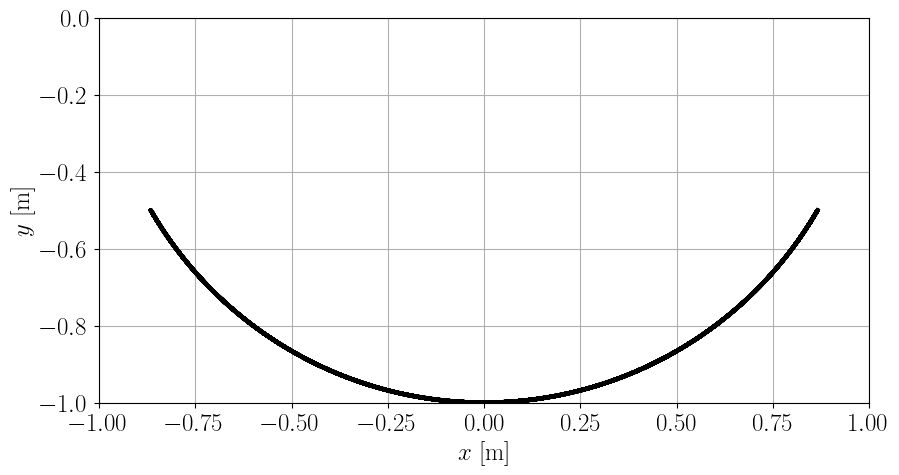

In [81]:
# Definindo as variáveis do problema
L = 1.0                     # comprimento do fio [m]
g = 9.81                    # aceleração gravitacional [m/s^2]
m = 1.0                     # massa da esfera [kg]
N = 1000                    # numero de amostras para simular
t = np.linspace(0,20,N)     # vetor tempo

def pendulo(z,t,L,m,g):
    theta = z[0]
    p = z[1]
    dot_theta = p/(m*(L**2))
    dot_p = -m*g*L*np.sin(theta)
    dot_z = [dot_theta,dot_p]
    return dot_z

theta0 = np.pi/3            # condição inicial theta
p0 = 0                      # condição inicial para p
z0 = [theta0,p0]
z = odeint(pendulo,z0,t,args=(L,m,g))

plt.figure(figsize=(10,5))
plt.plot(L*np.sin(z[:,0]),-L*np.cos(z[:,0]),color='k',linewidth=3)
plt.ylabel("$y$ [m]")
plt.xlabel("$x$ [m]")
plt.grid(True)
plt.xlim(-1.0,1.0)
plt.ylim(-1.0,0.0)
plt.axis()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()

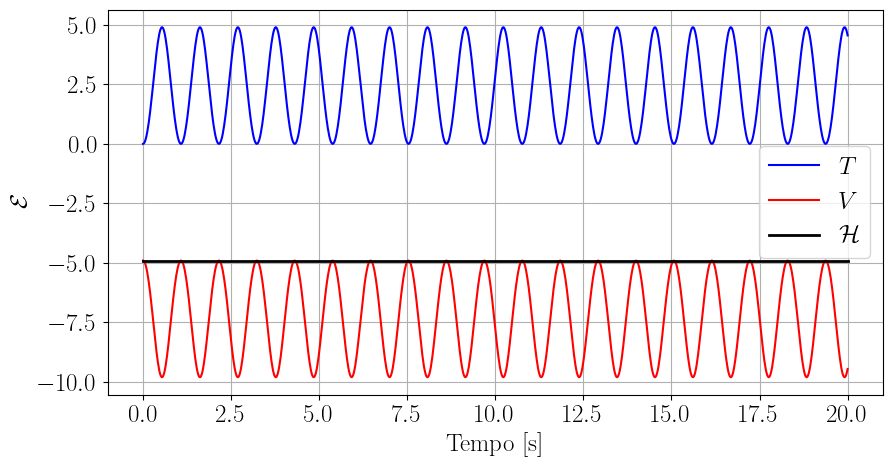

In [85]:
p = z[:,1]
theta = z[:,0]

# Energia cinética
T = 0.5*m*((p/(m*L**2))**2)*L**2
# Energia potencial
V = -m*g*L*np.cos(theta)
# Hamiltoniana
H = T+V

plt.figure(figsize=(10,5))
plt.plot(t,T,color = 'b',linewidth=1.5,label='$T$')
plt.plot(t,V,color = 'r',linewidth=1.5,label='$V$')
plt.plot(t,H,color = 'k',linewidth=2,label='$\mathcal{H}$')
plt.ylabel("$\mathcal{E}$")
plt.xlabel("Tempo [s]")
plt.grid(True)
plt.axis()
plt.legend()
# ax = plt.gca()
# ax.set_aspect('equal', adjustable='box')
plt.show()

### **2. Obtenção da Hamiltoniana $\mathcal{H}$ de um aro.**